# Variable coefficient acoustics equation

This example is taken from 

> B. Fornberg, Practical Guide to Pseudo-Spectral Methods

see Section 4.2 and figures 4.2-1 and 4.2-2 in that section.

We solve

\begin{align}
u_t &= v_x \\
v_t &= c^2(x) u_x
\end{align}

with periodic boundaries and initial condition

$$
u(x,0) = 2 v(x,0) = \exp(-1600(x-1/4)^2)
$$

and

$$
c(x) = \begin{cases}
1, & -1 < x < 0 \\
1/2, & 0 < x < 1
\end{cases}
$$

The characteristic variables are

$$
w_1 = u/2 - v/(2c), \qquad w_2 = u/2+ v/(2c)
$$

and

$$
\partial_t w_1  - c \partial_x w_1 = 0, \qquad
\partial_t w_2  + c \partial_x w_2 = 0
$$

In [55]:
%config InlineBackend.figure_format='svg'
from matplotlib.collections import PolyCollection,LineCollection
from numpy import pi,linspace,sin,cos,exp,round,zeros,arange,real
from numpy.fft import fft,ifft,fftfreq
from matplotlib.pyplot import figure

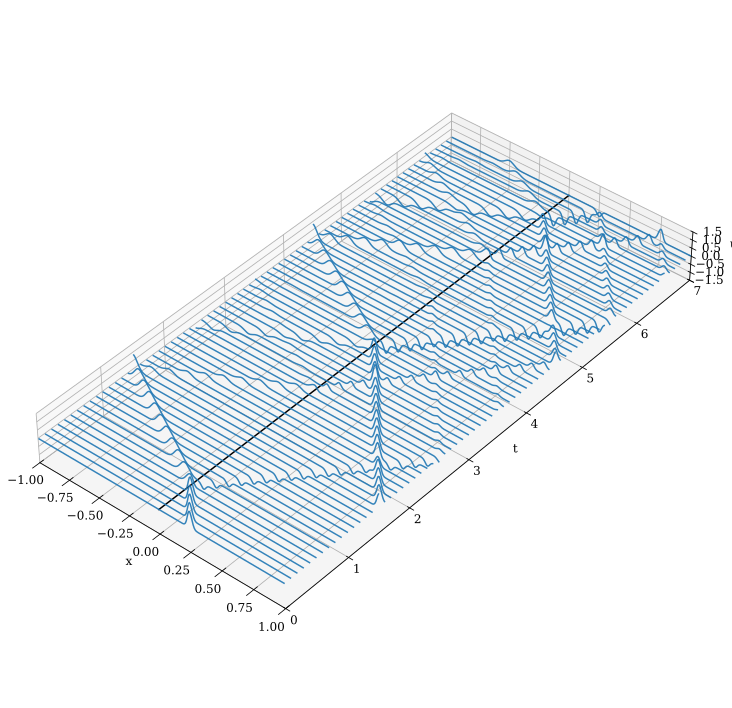

In [56]:
# Set up grid and differentiation matrix:
N = 256; h = 2/N; x = -1.0 + h*arange(1,N+1) - h/2;
t = 0.0; dt = h/10.0
tmax = 7.0; tplot = 0.1;
plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
nplots = int(round(tmax/tplot))

u0 = lambda x: exp(-1600*(x - 0.25)**2)
v0 = lambda x: 0.5*exp(-1600*(x - 0.25)**2)

c = (x < 0.0)*(1.0) + (x >= 0.0)*(0.5)

u, v = u0(x), v0(x)

# Interpolate characteristic variables (CHECK)
w1 = 0.5*u0(x+c*dt) - 0.5*v0(x+c*dt)/c
w2 = 0.5*u0(x-c*dt) + 0.5*v0(x-c*dt)/c

uold = w1 + w2
vold = c*(w2 - w1)

# wave numbers
k = 2 * pi * fftfreq(N,h)
ik = 1j * k

# Time-stepping by leap-frog formula
data = []; data.append(list(zip(x, u)))
tdata = []; tdata.append(0.0)
for i in range(1,nplots+1):
    for n in range(plotgap):
        t = t + dt
        u_hat, v_hat = fft(u), fft(v)
        ux_hat, vx_hat = ik * u_hat, ik * v_hat
        ux, vx = real(ifft(ux_hat)), real(ifft(vx_hat))
        unew = uold + 2.0 * dt * vx
        vnew = vold + 2.0 * dt * c**2 * ux
        uold = u; u = unew;
        vold = v; v = vnew;
    data.append(list(zip(x, u)))
    tdata.append(t);

fig = figure(figsize=(12,10))
ax = fig.add_subplot(111,projection='3d')
#poly = PolyCollection(data, closed=False, facecolors='white', edgecolors='red')
poly = LineCollection(data)
poly.set_alpha(0.9)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.plot([0,0],[0,7],'k-')
ax.set_xlabel('x'); ax.set_ylabel('t'); ax.set_zlabel('u')
ax.set_xlim3d(-1, 1); ax.set_ylim3d(0, 7); ax.set_zlim3d(-1.5, 1.5)
ax.view_init(40,-50)
ax.set_box_aspect(aspect=(0.5, 1, 0.1))

## Make animation

In [57]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
rc('animation', html='jshtml')

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1.1, 1.1))
line, = ax.plot([], [], 'r-', lw=2, label='u')
ax2 = ax.twinx()
speed, = ax2.plot(x,c,'k:',lw=1,label='c')
ax.legend(loc='upper left'), ax2.legend(loc='upper right')
ax.set_xlabel('x'); ax.set_ylabel('u'); ax2.set_ylabel('c')
plt.close();

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x, v = zip(*data[i])
    line.set_data(x, v)
    ax.set_title("t = "+str(tdata[i]))
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, repeat=False,
                               frames=len(data), interval=50, blit=True)
# Save to file
try:
    anim.save('acoustics_1d.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
except:
    print("Cannot save mp4 file")

In [58]:
# Use this for inline display with controls
anim

The dotted line shows the speed function $c(x)$.

In [59]:
# Use this for inline display of movie
#from IPython.display import HTML
#HTML(anim.to_html5_video())